In [2]:
import pandas as pd
dataset = pd.read_csv('Creditcard_data.csv')

In [3]:
#Class count and Separate Class
class_count_0, class_count_1 = dataset['Class'].value_counts()
class_0 = dataset[dataset['Class'] == 0]
class_1 = dataset[dataset['Class'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (763, 31)
class 1: (9, 31)


In [4]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under['Class'].value_counts())

total class of 1 and0: 0    9
1    9
Name: Class, dtype: int64


In [5]:
#UnderSampling
# class count
class_count_0, class_count_1 = dataset['Class'].value_counts()

# Separate class
class_0 = test_under[test_under['Class'] == 0]
class_1 = test_under[test_under['Class'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (9, 31)
class 1: (9, 31)


total class of 1 and 0: 0    9
1    9
Name: Class, dtype: int64


<AxesSubplot: title={'center': 'count (target)'}>

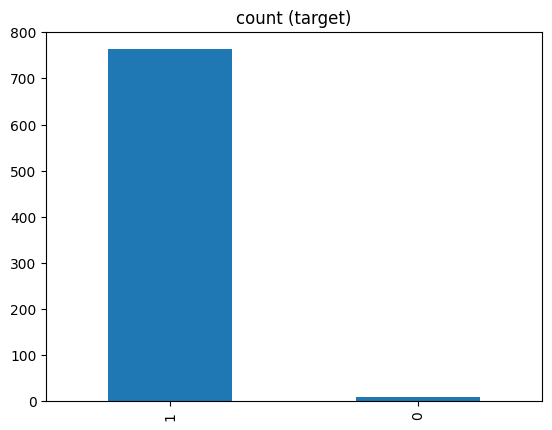

In [6]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_under['Class'].value_counts())
test_over['Class'].value_counts().plot(kind='bar', title='count (target)')

In [7]:
#Oversampling
# class count
class_count_0, class_count_1 = dataset['Class'].value_counts()

# Separate class
class_0 = test_over[test_over['Class'] == 0]
class_1 = test_over[test_over['Class'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (9, 31)
class 1: (763, 31)


In [8]:
from imblearn.over_sampling import RandomOverSampler
# Split dataset into input features and labels
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

# Apply Random Over Sampling to balance the dataset
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Save the balanced dataset to a new CSV file
balanced_data = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
balanced_data.to_csv('balanced_creditcard.csv', index=False)


In [11]:
z=1.96
p=0.5
e=0.05
n = (z**2*p*(1-p))/(e**2)
n

384.1599999999999

Sampling Techniques
1.Random Sampling
2.Systematic Sampling
3.Cluster Sampling
4.Stratified Sampling

In [44]:
#Sampling no 1- Random Sampling
import math


confidence_level = 0.95
margin_of_error = 0.05


balanced_data = pd.read_csv('balanced_creditcard.csv')
total_population = balanced_data.shape[0]


sample_size = (1.96**2 * 0.5 * 0.5 * total_population) / ((margin_of_error**2 * (total_population - 1)) + (1.96**2 * 0.5 * 0.5))


sample_size1 = math.ceil(sample_size)


print("Sample size for random sampling: ", sample_size1)

Sample1 = balanced_data.sample(n=sample_size1, random_state=42)

Sample1.to_csv('creditcard_random_sample.csv', index=False)

Sample1

Sample size for random sampling:  308


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1439,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
76,49,-0.549626,0.418949,1.729833,0.203065,-0.187012,0.253878,0.500894,0.251256,-0.227985,...,0.115062,0.418529,-0.065133,0.264981,0.003958,0.395969,0.027182,0.043506,59.99,0
1010,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69,1
660,499,1.255439,0.307729,0.292700,0.699873,-0.428876,-1.088456,0.043840,-0.167739,0.128854,...,-0.294795,-0.882126,0.136846,0.327949,0.194459,0.096516,-0.027271,0.029491,1.98,0
1132,539,-1.738582,0.052740,1.187057,-0.656652,0.920623,-0.291788,0.269083,0.140631,0.023464,...,-0.179545,-0.192036,-0.261879,-0.237477,-0.335040,0.240323,-0.345129,-0.383563,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
233,155,1.171954,0.311213,0.313605,0.519230,-0.058032,-0.258769,-0.043843,0.039599,-0.344227,...,-0.200153,-0.541916,0.137491,-0.001739,0.139121,0.104376,-0.005414,0.018728,1.29,0
1475,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.00,1
196,130,-0.485238,0.658497,1.949967,1.249695,0.426410,0.231513,0.585115,0.029163,-0.520297,...,0.007290,0.328244,-0.232563,0.225572,0.025892,-0.247395,-0.025381,-0.118565,5.97,0


In [24]:
#Sampling no 2- Systematic Sampling
import math
n = len(dataset)
k = int(math.sqrt(n))
Sample2 = balanced_data.iloc[::k]
print(Sample2.head())

     Time        V1        V2        V3        V4        V5        V6  \
0       0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
27     23  1.322707 -0.174041  0.434555  0.576038 -0.836758 -0.831083   
54     37  1.295668  0.341483  0.081505  0.566746 -0.110459 -0.766325   
81     52  1.147369  0.059035  0.263632  1.211023 -0.044096  0.301067   
108    73  1.162281  1.248178 -1.581317  1.475024  1.138357 -1.020373   

           V7        V8        V9  ...       V21       V22       V23  \
0    0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474   
27  -0.264905 -0.220982 -1.071425  ... -0.284376 -0.323357 -0.037710   
54   0.073155 -0.168304  0.071837  ... -0.323607 -0.929781  0.063809   
81  -0.132960  0.227885  0.252191  ... -0.087813 -0.110756 -0.097771   
108  0.638387 -0.136762 -0.805505  ... -0.124012 -0.227150 -0.199185   

          V24       V25       V26       V27       V28  Amount  Class  
0    0.066928  0.128539 -0.189115  0.133558 -0.021053  14

In [23]:
#Sampling no 3- Cluster Sampling
def get_clustered_Sample(df, n_per_cluster, num_select_clusters):
    N = len(df)
    K = int(N/n_per_cluster)
    data = None
    for k in range(K):
        sample_k = df.sample(n_per_cluster)
        sample_k["cluster"] = np.repeat(k,len(sample_k))
        df = df.drop(index = sample_k.index)
        data = pd.concat([data,sample_k],axis = 0)

    random_chosen_clusters = np.random.randint(0,K,size = num_select_clusters)
    samples = data[data.cluster.isin(random_chosen_clusters)]
    return(samples)

Sample3 = get_clustered_Sample(df = balanced_data, n_per_cluster = 600, num_select_clusters = 2)
print(Sample3)

      Time        V1        V2        V3        V4        V5        V6  \
961    164  0.073497  0.551033  0.451890  0.114964  0.822947  0.251480   
963    406 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
724    548 -1.233426 -0.212441  1.839632 -1.802986 -0.493195  0.350424   
134     83 -1.897331  0.955626  0.052543  1.276656 -3.323084  3.229911   
983      0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
...    ...       ...       ...       ...       ...       ...       ...   
1143   574  1.257719  0.364739  0.306923  0.690638 -0.357792 -1.067481   
450    328 -4.236419 -4.459784  1.381813  1.117080  6.044486 -3.498447   
1151     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
874    164  0.073497  0.551033  0.451890  0.114964  0.822947  0.251480   
504    370  1.354445 -0.815297  0.836498 -0.617140 -1.304124 -0.025274   

            V7        V8        V9  ...       V22       V23       V24  \
961   0.296319  0.139497 -0.123050  ..

In [50]:
#Sampling no 4-Stratified Sampling
Sample4 = balanced_data.groupby('Class', group_keys=False).apply(lambda x:x.sample(300))
Sample4

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
454,332,1.084303,0.127678,1.389853,2.532559,-0.636871,0.651109,-0.685289,0.356924,-0.052520,...,-0.055487,-0.088642,-0.012251,-0.026491,0.290882,-0.039353,0.033400,0.022966,11.34,0
313,225,-0.608831,0.876837,2.495715,3.138674,0.161264,-0.107099,0.515854,-0.138226,-1.035070,...,-0.262866,-0.439237,-0.006775,0.717471,0.199742,0.072401,0.099756,-0.136524,35.11,0
670,509,-0.152397,-0.748114,1.659571,-2.160601,-1.448594,0.558854,-0.274352,0.010159,-1.964295,...,0.004382,0.474039,-0.084319,-0.353695,-0.226044,-0.143999,-0.173635,-0.241563,114.00,0
309,222,1.086971,0.045122,0.475774,1.344244,-0.302641,0.004408,-0.096404,0.182898,0.193464,...,-0.044044,-0.007869,-0.044243,0.213380,0.562625,-0.340026,0.026737,0.007185,18.61,0
688,519,0.764614,1.706191,-1.755823,1.557386,1.101083,-1.529455,0.917702,-0.190132,-0.748935,...,-0.085310,0.022452,0.056012,0.008466,-0.459204,-0.421570,0.260012,0.006571,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
973,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1
1094,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.00,1
1123,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1


In [11]:
#Sampling no 5-Stratified Random Sampling
Sample5 = balanced_data.groupby('Class', group_keys=False).apply(lambda x:x.sample(600))
Sample5

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
235,156,-3.494861,-2.894450,1.637989,-0.274976,-0.389203,-0.703275,0.444194,0.154266,0.695818,...,0.017010,-0.063521,0.676254,0.596377,0.114229,0.834915,0.309675,0.632261,500.00,0
685,517,-0.639474,-0.048355,2.452755,0.310804,-0.430963,-0.290032,0.166889,0.006196,0.651675,...,0.004189,0.110847,0.057008,0.389171,-0.449642,0.218186,-0.067664,-0.073760,59.90,0
570,427,-0.847312,0.854261,0.338816,0.890137,0.804751,1.165501,-0.081408,0.879014,-0.394737,...,-0.046690,-0.075301,-0.308479,-1.733137,0.087036,-0.129209,0.294334,0.071198,11.36,0
201,133,0.709336,-0.011679,-0.530213,0.236331,1.611750,4.091915,-0.862138,1.083973,0.786796,...,0.006775,0.090033,0.271773,0.986547,-0.809943,-0.529660,-0.065887,-0.125002,35.97,0
716,539,-0.420050,1.034648,1.565850,-0.029643,-0.054336,-0.907983,0.688436,-0.063128,-0.389635,...,-0.228282,-0.598231,-0.023081,0.360199,-0.194316,0.071640,0.265159,0.121071,1.29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
1209,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1
1301,574,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,1.29,1
951,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69,1


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

X = Sample1.drop('Class', axis=1)
y = Sample1['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values
acc1=[]
for key, classifier in classifiers.items():
    
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    acc1.append(round(training_score.mean(), 2) * 100)
    print(round(training_score.mean(),2)*100)
    
    

88.0
90.0
63.0
97.0


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Checking accuracy of different machine learning models using various sampling Techniques

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

X = Sample2.drop('Class', axis=1)
y = Sample2['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values
acc1=[]
for key, classifier in classifiers.items():
    
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    acc1.append(round(training_score.mean(), 2) * 100)
    print(round(training_score.mean(),2)*100)

87.0
56.00000000000001
53.0
80.0


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

X = Sample3.drop('Class', axis=1)
y = Sample3['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values
acc1=[]
for key, classifier in classifiers.items():
    
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    acc1.append(round(training_score.mean(), 2) * 100)
    print(round(training_score.mean(),2)*100)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

92.0
97.0
71.0
99.0


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

X = Sample4.drop('Class', axis=1)
y = Sample4['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values
acc1=[]
for key, classifier in classifiers.items():
    
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    acc1.append(round(training_score.mean(), 2) * 100)
    print(round(training_score.mean(),2)*100)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

90.0
94.0
69.0
98.0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

X = Sample5.drop('Class', axis=1)
y = Sample5['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values
acc1=[]
for key, classifier in classifiers.items():
    
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    acc1.append(round(training_score.mean(), 2) * 100)
    print(round(training_score.mean(),2)*100)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

91.0
97.0
70.0
99.0


Conclusion:- We can see that Decision Tree Classifier gives 99% accuracy using Cluster Sampling Technique.